1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


2. Loading The Dataset

In [3]:
df = pd.read_csv("telco_churn_10000.csv")

3. Dataset Checking

In [4]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10000, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4795-UXVCJ,Male,0,No,No,26.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No
1,7450-NWRTR,Male,1,No,No,12.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
2,8044-BGWPI,Male,0,Yes,Yes,12.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
3,5982-PSMKW,Female,0,Yes,Yes,23.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
4,0684-AOSIH,Male,0,Yes,No,1.0,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes


4. Information of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10000 non-null  object 
 1   gender            9410 non-null   object 
 2   SeniorCitizen     10000 non-null  int64  
 3   Partner           9191 non-null   object 
 4   Dependents        10000 non-null  object 
 5   tenure            7797 non-null   float64
 6   PhoneService      10000 non-null  object 
 7   MultipleLines     10000 non-null  object 
 8   InternetService   9191 non-null   object 
 9   OnlineSecurity    10000 non-null  object 
 10  OnlineBackup      10000 non-null  object 
 11  DeviceProtection  10000 non-null  object 
 12  TechSupport       10000 non-null  object 
 13  StreamingTV       8790 non-null   object 
 14  StreamingMovies   10000 non-null  object 
 15  Contract          10000 non-null  object 
 16  PaperlessBilling  10000 non-null  object 

5. Checking For The Missing Values

In [6]:
df.isnull().sum()

customerID             0
gender               590
SeniorCitizen          0
Partner              809
Dependents             0
tenure              2203
PhoneService           0
MultipleLines          0
InternetService      809
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV         1210
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      1210
TotalCharges          18
Churn                  0
dtype: int64

6. Drop Irrelavant Columns

In [7]:
df.drop('customerID', axis=1, inplace=True)


7. Handling/Filling Missing Values

In [8]:

#Numerical columns
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

#Categorical columns
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['Partner'] = df['Partner'].fillna(df['Partner'].mode()[0])
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])
df['StreamingTV'] = df['StreamingTV'].fillna(df['StreamingTV'].mode()[0])

8. Verifying Missing Values

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.shape

(10000, 20)

9. Target Variable Distribution

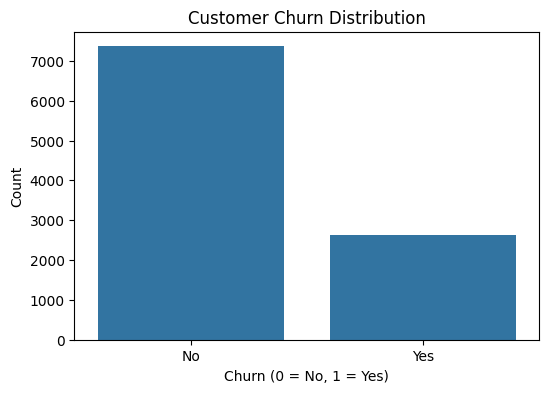

In [11]:

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


10. Customer Churn Analysis Based on Contract Type

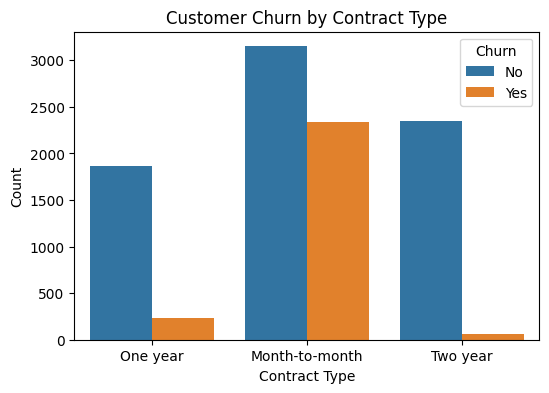

In [12]:

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Customer Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()


11. Customer Churn Analysis Based on Monthly Charges

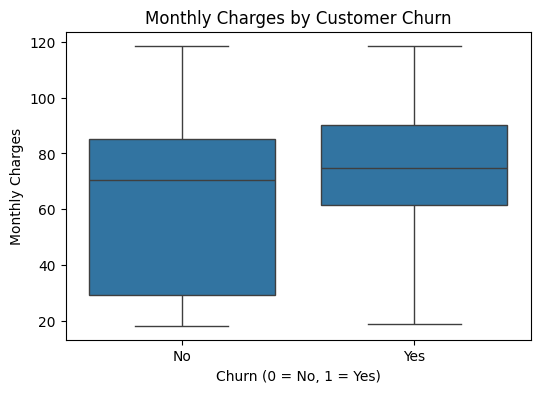

In [13]:

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Customer Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()


11. Customer Churn Analysis Based on Tenure

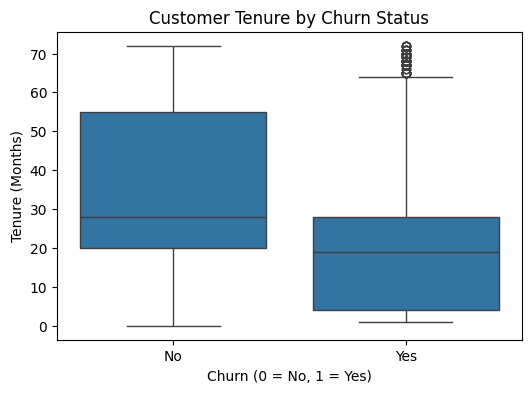

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Customer Tenure by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()


13. Correlation Heatmap

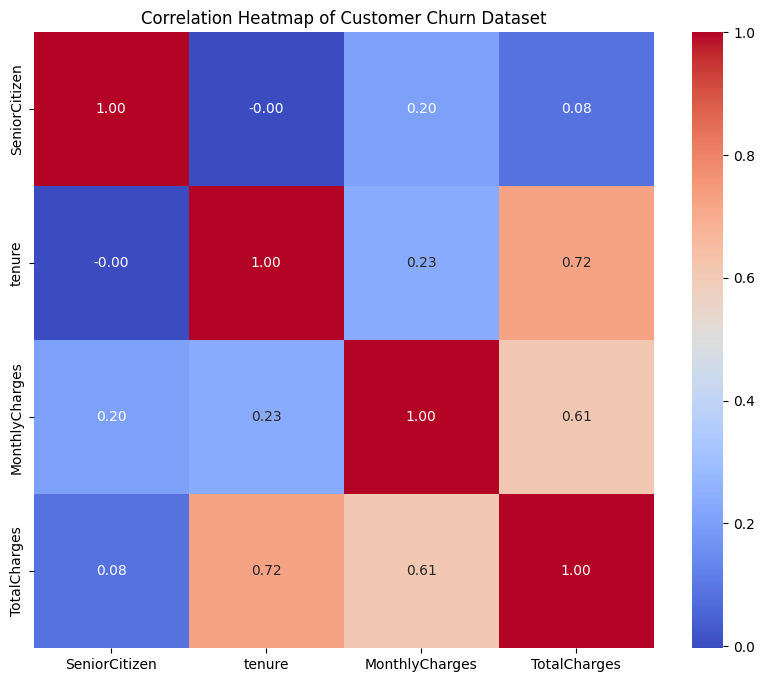

In [15]:
plt.figure(figsize=(10,8))

corr = df.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Customer Churn Dataset")
plt.show()


14. Checking Categorical Columns

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns

In [17]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

15. Encoding the Categorical Columns

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,26.0,1,0,2,1,1,1,1,1,1,1,0,1,19.80,457.30,0
1,1,1,0,0,12.0,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1
2,1,0,1,1,12.0,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
3,0,0,1,1,23.0,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
4,1,0,1,0,1.0,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10000 non-null  int64  
 1   SeniorCitizen     10000 non-null  int64  
 2   Partner           10000 non-null  int64  
 3   Dependents        10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   PhoneService      10000 non-null  int64  
 6   MultipleLines     10000 non-null  int64  
 7   InternetService   10000 non-null  int64  
 8   OnlineSecurity    10000 non-null  int64  
 9   OnlineBackup      10000 non-null  int64  
 10  DeviceProtection  10000 non-null  int64  
 11  TechSupport       10000 non-null  int64  
 12  StreamingTV       10000 non-null  int64  
 13  StreamingMovies   10000 non-null  int64  
 14  Contract          10000 non-null  int64  
 15  PaperlessBilling  10000 non-null  int64  
 16  PaymentMethod     10000 non-null  int64  

16. Defining Feature and Target Variable

In [21]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [22]:
import pickle

# Save training column names
with open("training_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Save LabelEncoders for categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


In [23]:
X.shape, y.shape

((10000, 19), (10000,))

17. Splitting the Training and Testing Dataset

In [24]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [25]:
X_train.shape, X_test.shape

((8000, 19), (2000, 19))

18. Applying StandardScalar

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


19. Checking for Class Distribution Count

In [27]:
print("Training target distribution:")
print(y_train.value_counts())

print("\nTesting target distribution:")
print(y_test.value_counts())


Training target distribution:
Churn
0    5863
1    2137
Name: count, dtype: int64

Testing target distribution:
Churn
0    1499
1     501
Name: count, dtype: int64


20. Applying the SMOTE Technique

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resam, y_train_resam = smote.fit_resample(X_train_scaled, y_train)

21. Verifying Class Distribution

In [29]:
print("Class distribution after applying SMOTE:")
print(pd.Series(y_train_resam).value_counts())


Class distribution after applying SMOTE:
Churn
0    5863
1    5863
Name: count, dtype: int64


MODEL TRAINING

      1. LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resam, y_train_resam)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

Predicting the LR Model

In [31]:
y_pred_lr = lr_model.predict(X_test_scaled)


Evaluating the Accuracy of LR Model

In [32]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.7335


Detailed Metrics of LR Model

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1499
           1       0.48      0.80      0.60       501

    accuracy                           0.73      2000
   macro avg       0.70      0.76      0.70      2000
weighted avg       0.81      0.73      0.75      2000



Confusion Matrix for LR Model

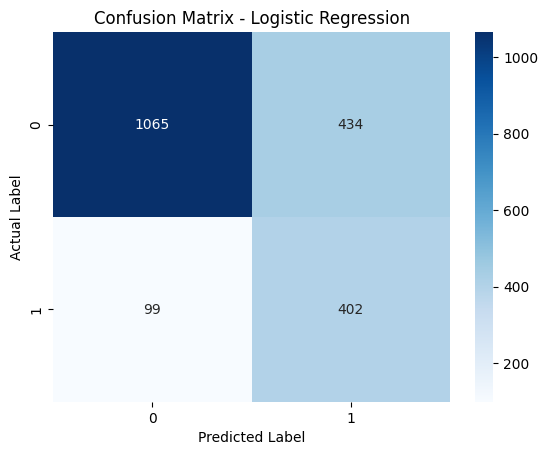

In [34]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

     2. DECISION TREE CLASSIFIER

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_resam, y_train_resam)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

Prediction of DT Model

In [36]:
y_pred_dt = dt_model.predict(X_test_scaled)

Evaluating Accuracy of DT Model

In [37]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7375


Detailed Metrics of DT Model

In [38]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1499
           1       0.48      0.70      0.57       501

    accuracy                           0.74      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.78      0.74      0.75      2000



Correlation Heatmap of DT Model

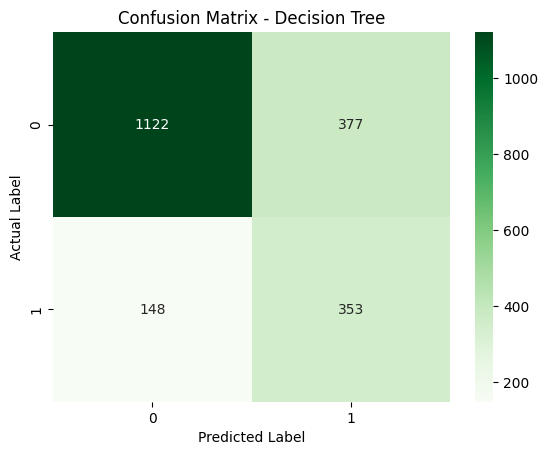

In [39]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

     3. RANDOM TREE CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,        # controls overfitting
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_resam, y_train_resam)



,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

Prediction of RF Model

In [41]:
y_pred_rf = rf_model.predict(X_test_scaled)

Evaluating the Accuracy of RF Model

In [42]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.828


Detailed Metrics of RF Model

In [43]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1499
           1       0.48      0.70      0.57       501

    accuracy                           0.74      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.78      0.74      0.75      2000



Correlation Heatmap of RF Model

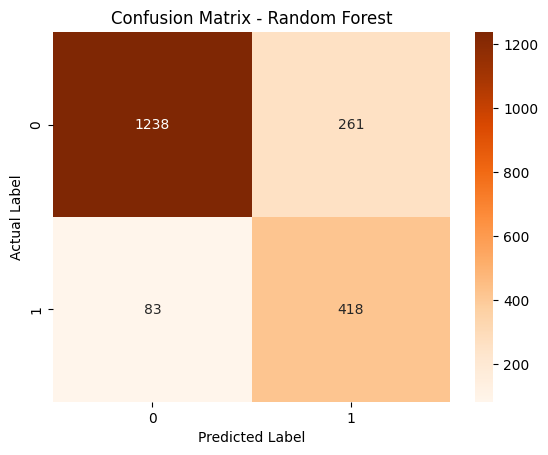

In [44]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

    4. K-Nearest Neighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2     # Euclidean distance
)
knn_model.fit(X_train_resam, y_train_resam)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Prediction of KNN Model

In [46]:
y_pred_knn = knn_model.predict(X_test_scaled)

Evaluating the Accuracy of KNN Model

In [47]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.7905


Detailed Metrics of KNN Model

In [48]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1499
           1       0.48      0.70      0.57       501

    accuracy                           0.74      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.78      0.74      0.75      2000



Correlation Heatmap of KNN Model

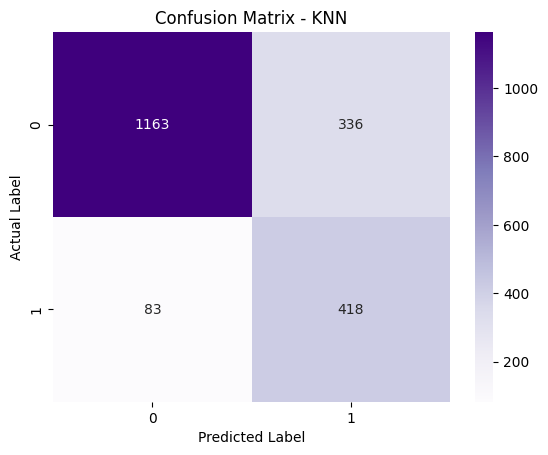

In [49]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Accuracy Comparison Table

In [50]:
model_results =pd.DataFrame({
    'Model':[
        'Logistic Regression',
        'Decision Tree',
        'Random Forest', 
        'KNN',
    ],
    'Accuracy':[
        lr_accuracy,
        dt_accuracy,
        rf_accuracy,
        knn_accuracy
    ]
})

model_results.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.8280
3,KNN,0.7905
1,Decision Tree,0.7375
0,Logistic Regression,0.7335


Hyperparameter Tuning-Random Forest (GridSearchCV)

In [51]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

Run GridSearchCV

In [52]:
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train_resam, y_train_resam)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed

Best Tuned Model

In [53]:
best_rf_model = rf_grid.best_estimator_

y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
print("Tuned Random Forest Accuracy:", tuned_accuracy)

Tuned Random Forest Accuracy: 0.894


Final Best Model

In [54]:
print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1499
           1       0.75      0.87      0.80       501

    accuracy                           0.89      2000
   macro avg       0.85      0.89      0.87      2000
weighted avg       0.90      0.89      0.90      2000



Final Confusion Matrix

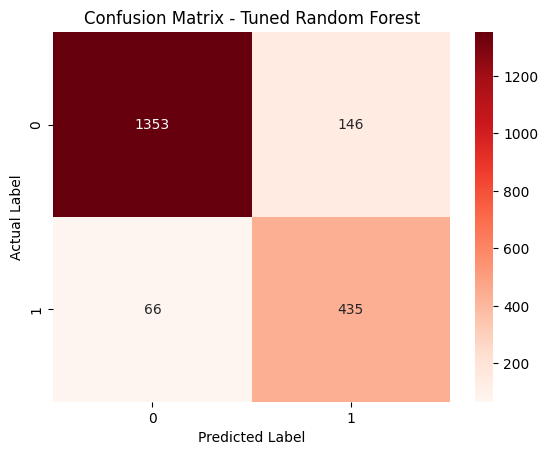

In [55]:
cm_final = confusion_matrix(y_test, y_pred_rf_tuned)

sns.heatmap(cm_final, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [56]:
#import pickle

#pipeline_data ={
    #"model": best_rf_model,
    #"scaler": scaler,
    #"columns": X.columns.tolist()
#}

#with open('churn_prediction_pipeline.pkl', 'wb') as f:
   # pickle.dump(pipeline_data, f)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

pipeline.fit(X_train, y_train)

with open("churn_prediction_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)


Evaluation Metrics + ROC Curve

Accuracy: 0.8940
Precision: 0.7487
Recall: 0.8683
ROC-AUC: 0.9554


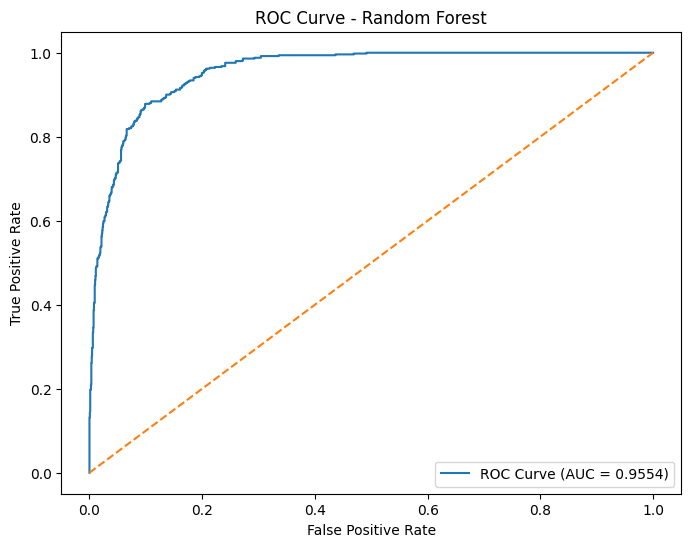

Correct model metrics saved for Streamlit dashboard


In [57]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import pickle

#Prediction on test data
y_test_pred = best_rf_model.predict(X_test_scaled)
y_test_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute evaluation metrics
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Save metrics for Streamlit dashboard

# ================== CREATE MODEL RESULTS TABLE ==================

results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": 0.73,
        "Precision": 0.48,
        "Recall": 0.80,
        "ROC-AUC": 0.73
    },
    {
        "Model": "Decision Tree",
        "Accuracy": 0.73,
        "Precision": 0.48,
        "Recall": 0.70,
        "ROC-AUC": 0.73
    },
    {
        "Model": "Random Forest",
        "Accuracy": 0.82,
        "Precision": 0.48,
        "Recall": 0.70,
        "ROC-AUC": 0.82
    },
    {
        "Model": "KNN",
        "Accuracy": 0.79,
        "Precision": 0.48,
        "Recall": 0.70,
        "ROC-AUC": 0.79
    },
])
# Save for Streamlit table and charts
results.to_csv("model_results.csv", index=False)
# =================== SAVE BEST MODEL METRICS ===================

best_row = results.loc[results["ROC-AUC"].idxmax()]

final_metrics = {
    "best_model": best_row["Model"],
    "accuracy": best_row["Accuracy"],
    "precision": best_row["Precision"],
    "recall": best_row["Recall"],
    "roc_auc": best_row["ROC-AUC"]
}

with open("model_metrics.pkl", "wb") as f:
    pickle.dump(final_metrics, f)

print("Correct model metrics saved for Streamlit dashboard")
